The first step would be to import all the relevant packages

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now, I will read the csv file to a dataframe called df

In [3]:
df = pd.read_csv('/Users/shubhangimallik/Downloads/midterm_data (1).csv')

I will use the head function to quickly take a look at the data

In [4]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In the above set we can see that 'device' and 'location' are the two categorical columns and the rest are numeric

Now, I will use the info function to see if there is any missing data or not

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


Above, we can see that apart from device and location, the rest of the columns are full

We can see that out of 5000 entries,

device has (5000-4900) = 100 missing data points, which is 2% missing data
 
location has (5000-4970) = 30 missing data points, which is 0.6% missing data


There are three ways to approach this missing data situation. 

1. Delete all missing data
2. Impute the missing data with mode since both the columns, device and location have categorical values
3. Impute the missing data with 'other' or 'unknown'. 

In [13]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Here, I have used th describe function to get some more information about the dataset, here we can see that :

1. The mean time spent is 25 but the the max time spent is 90 so there might be some outlier here

2. The mean cart value is almost 150 but the max is 427 so there might be some outlier here

3. The top device is Desktop and the top location is Location 4. We can use this informtation to impute the data later but it might bias our dataset

We will need to do some data cleaning to make sure that we can do accurate analysis


First, we should check if there are any rows where all 4 columns have a missing data point; these rows we should drop immediately.

Device: Since, desktop is the most frequently occuring device type, we can impute the missing data with it, it also has a frequency of 2538 which is high enough but it might still bias the data.

Location: Since, Location 4 is the most frequently occuring location type, we can impute the missing data with it but its frequency is low(1056) so it might not bias the data.

Let's start by identifying rows where both device and location data points are missing.

In [15]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


There is one row where both device and location is missing, we can drop this row for our analysis

In [16]:
df.drop([2130], axis=0, inplace=True)

I will run the same code again to see if there is any other row which has these two missing data points

In [17]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


Here, we can clearly see that there is no row now which has these two data points missing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [19]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.573915,41.542509,5.027205,25.159160,5.774355,14.965593,149.424353,0.272454,NaN,NaN
std,1443.654943,14.040833,2.595218,9.826407,2.571097,6.046672,68.705704,0.445267,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.500000,29.000000,3.000000,18.267083,4.000000,10.000000,92.465000,0.000000,NaN,NaN
50%,2501.000000,42.000000,5.000000,25.036202,6.000000,15.000000,143.340000,0.000000,NaN,NaN
75%,3750.500000,54.000000,7.000000,32.001153,8.000000,20.000000,198.330000,1.000000,NaN,NaN


The numbers here have not changed much so we can assume that the one row we deleted is not causing too much change in the dataset

Since, we do not want to bias our dataset while cleaning it, we can impute the missing data with 'Other' or 'Unknown'

In [20]:
df_test=df.copy()

In [21]:
df_test['location'] = df_test['location'].fillna('Other')

In [22]:
df.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [23]:
df_test.groupby('location').describe()

userID                                                            
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
Other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

Here, we see that the mean values don't change much if we impute the missing data so our approach should be good

In [27]:
df_test_2 = df.copy()

In [28]:
df_test_2['location'] = df_test_2['location'].fillna('Location 4')

In [29]:
df_test_2.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1085.0  2504.508756  1465.947354  3.0  1221.00  2514.0  3783.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1085.0  40.976959  ...   199.4300  353.80          1085.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.283871  0.451083  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

Here, we can see that if we impute the missing data with 'Location 4', then its not affecting the data that much, this means we can work with this approach as well

Based on the above tests, I have decided to impute the original dataframe's missing location data with 'Location 4'

In [30]:
df['location'] = df['location'].fillna('Location 4')

I will repeat the same process for device column

In [32]:
df_test['device'] = df_test['device'].fillna('Other')
df_test_2['device'] = df_test_2['device'].fillna('Desktop')

In [36]:
df.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [34]:
df_test.groupby('device').describe()

userID                                                             
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [35]:
df_test_2.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2637.0  2478.844141  1433.266427  1.0  1259.00  2495.0  3721.00  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2637.0  41.336746  ...   196.9500  427.40          2637.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.282897  0.450492  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

Both approaches shows similar result but to be on the safer side, I will impute the missing data with 'desktop' as it will ensure we have a full dataset for our analysis

In [37]:
df['device'] = df['device'].fillna('Desktop')

Outliers

Now that we have cleaned up the structural issues in our DataFrame, we should check for outliers. The simple way to do this is by using a BoxPlot. We can use the seaborn boxplot() function to identify outliers.

There are more sophisticated techniques, for example calculating the z-score of each value, however since we have not yet done this in class, we will use a simple approach.

<Axes: ylabel='age'>

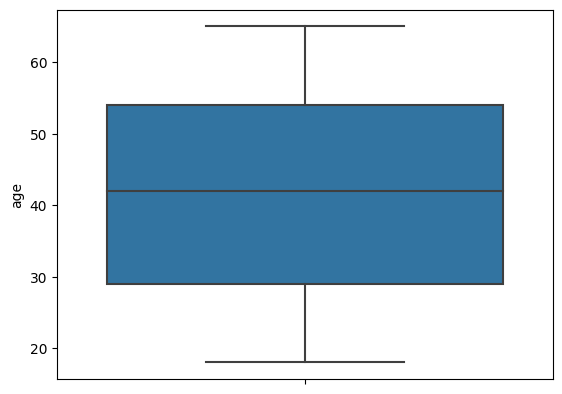

In [38]:
sns.boxplot(data = df, y='age')

Age has no outliers

<Axes: ylabel='sessions'>

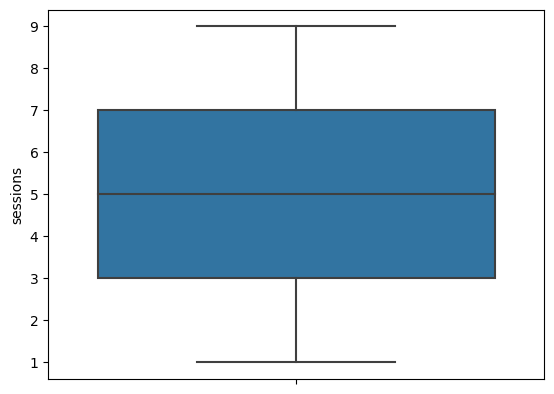

In [39]:
sns.boxplot(data = df, y='sessions')

Sessions has no outliers

<Axes: ylabel='time_spent'>

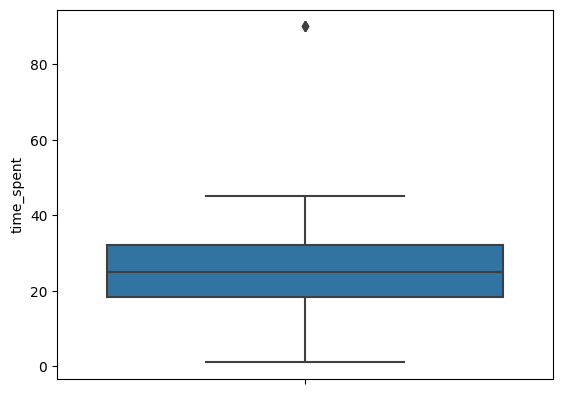

In [40]:
sns.boxplot(data = df, y='time_spent')

Time spent has one outlier which is above 80 so we should remove it

In [41]:
drop_timespent_outliers = df[df['time_spent']>80].index
drop_timespent_outliers

Index([284, 2494, 2833, 3957], dtype='int64')

In [43]:
df.drop(drop_timespent_outliers, inplace=True)

<Axes: ylabel='time_spent'>

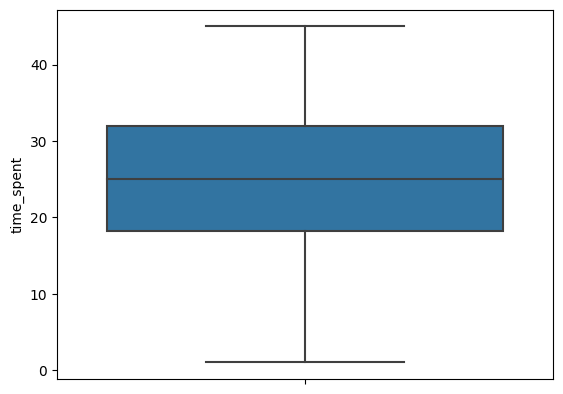

In [44]:
sns.boxplot(data = df, y='time_spent')

Now, there are no outliers in time spent

<Axes: ylabel='pages_visited'>

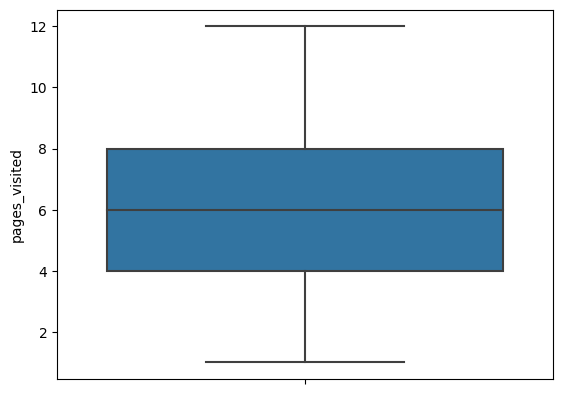

In [45]:
sns.boxplot(data = df, y='pages_visited')

No outliers in pages visited

<Axes: ylabel='cart_items'>

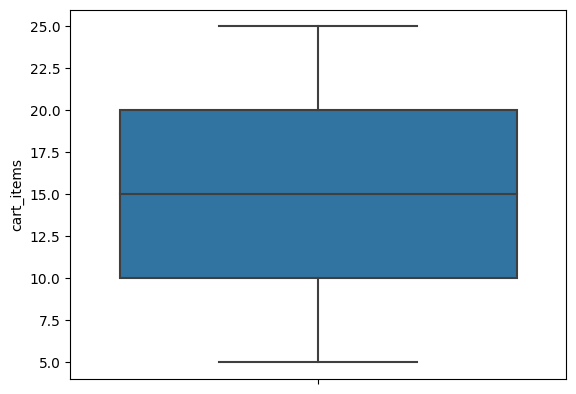

In [46]:
sns.boxplot(data = df, y='cart_items')

No outliers in cart items

<Axes: ylabel='cart_value'>

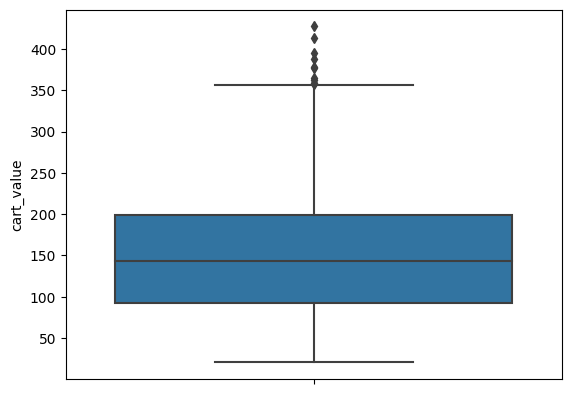

In [47]:
sns.boxplot(data = df, y='cart_value')

There are a few outliers in cart value and since we want a clean dataset without outliers, I will delete these outliers

In [48]:
drop_cartvalue_outliers = df[df['cart_value'] > 360].index
drop_cartvalue_outliers

Index([263, 445, 1268, 1479, 2615, 2664, 2769, 3200], dtype='int64')

There are 8 values that we need to drop from cart values

In [49]:
df.drop(drop_cartvalue_outliers, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4987 non-null   int64  
 1   age              4987 non-null   int64  
 2   sessions         4987 non-null   int64  
 3   time_spent       4987 non-null   float64
 4   pages_visited    4987 non-null   int64  
 5   cart_items       4987 non-null   int64  
 6   cart_value       4987 non-null   float64
 7   checkout_status  4987 non-null   int64  
 8   device           4987 non-null   object 
 9   location         4987 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 428.6+ KB


Finally, let's drop any duplicate entries.

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4987 non-null   int64  
 1   age              4987 non-null   int64  
 2   sessions         4987 non-null   int64  
 3   time_spent       4987 non-null   float64
 4   pages_visited    4987 non-null   int64  
 5   cart_items       4987 non-null   int64  
 6   cart_value       4987 non-null   float64
 7   checkout_status  4987 non-null   int64  
 8   device           4987 non-null   object 
 9   location         4987 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 428.6+ KB


How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Data cleaning steps are done. The final DataFrame has 4987 entries. The following is a summary on how this data has been cleaned. 

I dropped one row that had multiple missing values, which would cause challenges for imputation

I reviewed missing values in detail, and compared various approaches to imputing data. For the location, I assessed whether we should impute with "Other" or the mode which was 'Location 4', since both did not change the overall data much, I decided to go with 'Location 4' as it will provide a more complete dataset for analysis

I did the same steps for device column as well and imputed the missing values with 'Desktop'

I used a boxplot to identify outliers in all the columns with numeric values, and removed outliers. Outliers can cause issues later on during analysis so the best practice to drop them before we do any sort of analysis on the dataset

I dropped all duplicate entries. Duplicate entries do not provide any value to our analysis and can cause issues biasing the dataset so dropping duplicate values is the best option


In [53]:

overall_checkout_rate = df["checkout_status"].mean()
print("Overall Checkout Rate: {:.2%}".format(overall_checkout_rate))


Overall Checkout Rate: 27.31%


Overall checkout rate is pretty low. It is only 27.31%. We need to do further analysis to see more patterns

In [54]:
device_checkout_rate = df.groupby("device")["checkout_status"].mean()
print("\nCheckout Rate by Device:")
print(device_checkout_rate)


Checkout Rate by Device:
device
Desktop    0.283758
Mobile     0.265263
Tablet     0.255091
Name: checkout_status, dtype: float64


We can observe that the checkout rates across different device categories are relatively similar, with desktop users showing a slightly higher checkout rate compared to mobile and tablet users. This indicates that device type alone may not be the primary factor influencing the low checkout rate. Further analysis is required to identify other potential factors that may contribute to the issue.

In [55]:
location_checkout_rate = df.groupby("location")["checkout_status"].mean()
print("\nCheckout Rate by Location:")
print(location_checkout_rate)


Checkout Rate by Location:
location
Location 1    0.284394
Location 2    0.266316
Location 3    0.262636
Location 4    0.284395
Location 5    0.266735
Name: checkout_status, dtype: float64


We can observe that the checkout rates vary slightly across different locations. However, the differences are not substantial, indicating that location alone may not be the primary factor influencing the low checkout rate.

In [56]:
session_count_checkout_rate = df.groupby("sessions")["checkout_status"].mean()
print("\nCheckout Rate by Session Count:")
print(session_count_checkout_rate)


Checkout Rate by Session Count:
sessions
1    0.283525
2    0.278057
3    0.262963
4    0.295699
5    0.290385
6    0.272887
7    0.268739
8    0.261194
9    0.247078
Name: checkout_status, dtype: float64


We can observe that there is some variation in the checkout rates based on the session count. Users with higher session counts tend to have slightly higher checkout rates

In [57]:
bins = [0, 10, 20, 30, 100]
labels = ["0-10", "11-20", "21-30", "30+"]
df["time_spent_group"] = pd.cut(df["time_spent"], bins=bins, labels=labels, right=False)
time_spent_checkout_rate = df.groupby("time_spent_group")["checkout_status"].mean()
print("\nCheckout Rate by Time Spent:")
print(time_spent_checkout_rate)


Checkout Rate by Time Spent:
time_spent_group
0-10     0.000000
11-20    0.000000
21-30    0.306230
30+      0.493687
Name: checkout_status, dtype: float64


Based on these results, we can observe that users who spend more time on the website have a higher checkout rate. Users who spent 21-30 minutes or more than 30 minutes on the website show a relatively higher likelihood of proceeding to the checkout. On the other hand, users who spent less than 21 minutes on the website have a 0% checkout rate. This suggests that engagement and time spent on the website may play a significant role in influencing users to complete the checkout process.

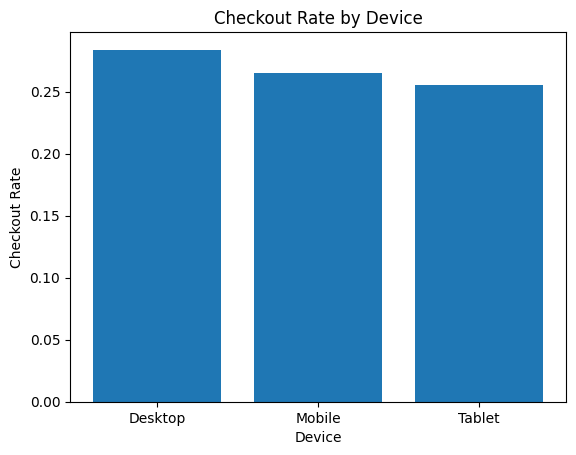

In [59]:
device_checkout_rate = df.groupby("device")["checkout_status"].mean()

plt.bar(device_checkout_rate.index, device_checkout_rate.values)
plt.xlabel("Device")
plt.ylabel("Checkout Rate")
plt.title("Checkout Rate by Device")
plt.show()


There is not much difference but desktop users have slightly higher checkout rate than mobile and tablet users

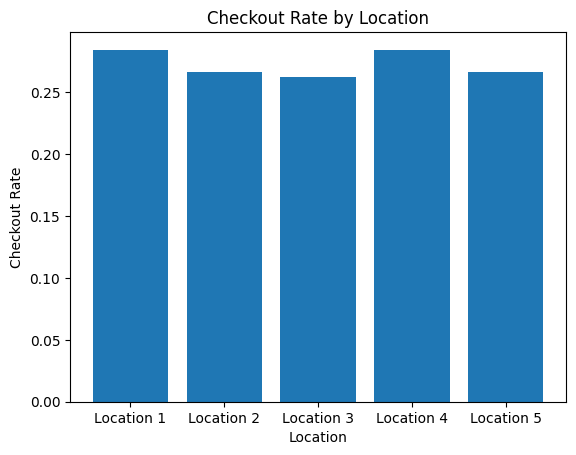

In [60]:
location_checkout_rate = df.groupby("location")["checkout_status"].mean()

plt.bar(location_checkout_rate.index, location_checkout_rate.values)
plt.xlabel("Location")
plt.ylabel("Checkout Rate")
plt.title("Checkout Rate by Location")
plt.show()

There is not much difference but Location 1 and Location 4 have slightly higher checkout rates

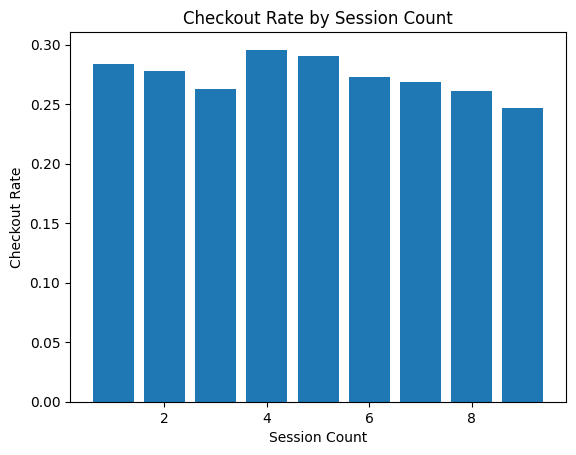

In [61]:


session_count_checkout_rate = df.groupby("sessions")["checkout_status"].mean()

plt.bar(session_count_checkout_rate.index, session_count_checkout_rate.values)
plt.xlabel("Session Count")
plt.ylabel("Checkout Rate")
plt.title("Checkout Rate by Session Count")
plt.show()


Session count between 4 and 6 have slightly higher checkout rate

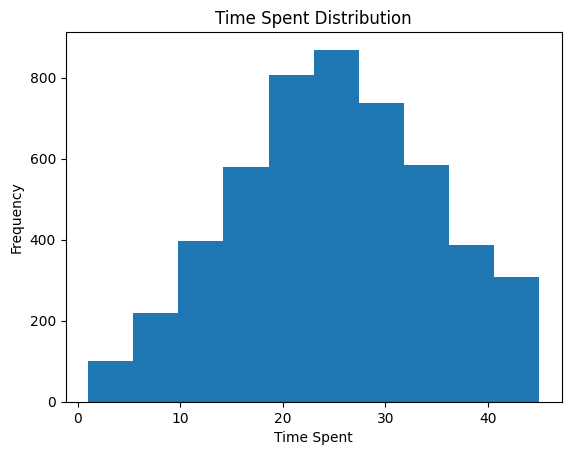

In [64]:


plt.hist(df["time_spent"],bins=10)
plt.xlabel("Time Spent")
plt.ylabel("Frequency")
plt.title("Time Spent Distribution")
plt.show()


This histogram shows that there is a clear peak when time spent is between 20 to 30 minutes

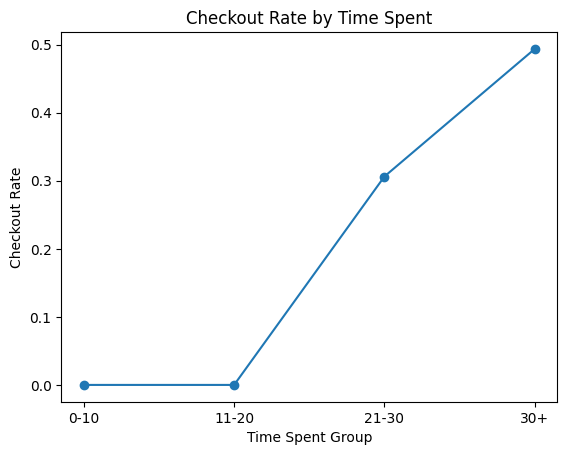

In [65]:
time_spent_checkout_rate = df.groupby("time_spent_group")["checkout_status"].mean()

plt.plot(time_spent_checkout_rate.index, time_spent_checkout_rate.values, marker='o')
plt.xlabel("Time Spent Group")
plt.ylabel("Checkout Rate")
plt.title("Checkout Rate by Time Spent")
plt.show()

Here, we can clearly see that time spent is directly related to the checkout rate. The line stays flat but shoots up when time spent is more than 20 minutes. 

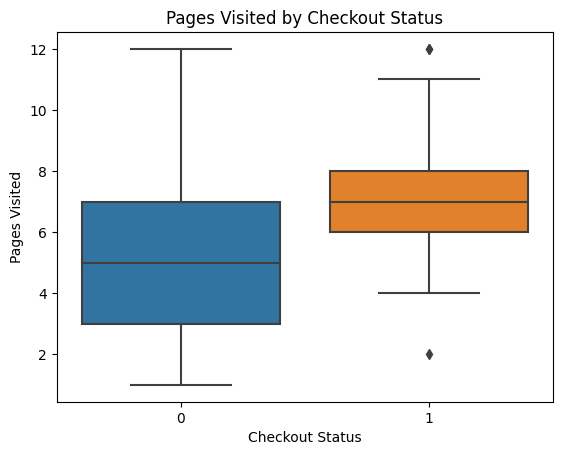

In [67]:
sns.boxplot(x=df["checkout_status"], y=df["pages_visited"])
plt.xlabel("Checkout Status")
plt.ylabel("Pages Visited")
plt.title("Pages Visited by Checkout Status")
plt.show()


Here, we can see that the mean pages visited when higher leads to positive checkout status

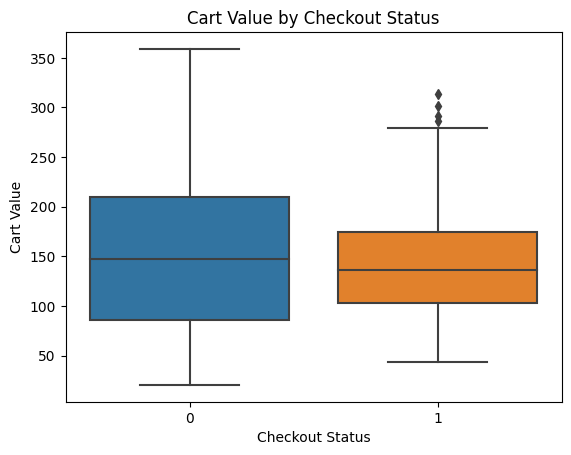

In [69]:
sns.boxplot(x=df["checkout_status"], y=df["cart_value"])
plt.xlabel("Checkout Status")
plt.ylabel("Cart Value")
plt.title("Cart Value by Checkout Status")
plt.show()


Here, we can see if the mean cart value is under 150, the checkout status is positive. However, there is not much difference here

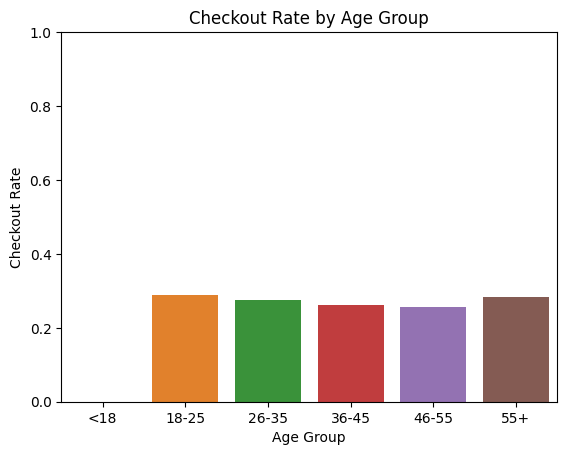

In [71]:
# Define the age group bins and labels
bins = [0, 18, 25, 35, 45, 55, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-55", "55+"]

# Create the age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate the checkout rate by age group
age_group_checkout_rate = df.groupby("age_group")["checkout_status"].mean().reset_index()

# Plot the checkout rate by age group
sns.barplot(x="age_group", y="checkout_status", data=age_group_checkout_rate)
plt.xlabel("Age Group")
plt.ylabel("Checkout Rate")
plt.title("Checkout Rate by Age Group")
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()

The checkout rate of different age groups does not differ a lot but the age group above 55+ has a slightly higher checkout rate

In [72]:
from scipy.stats import f_oneway, ttest_ind

# ANOVA - Compare cart value across checkout status groups
checkout_yes = df[df["checkout_status"] == 1]["cart_value"]
checkout_no = df[df["checkout_status"] == 0]["cart_value"]
f_stat, p_value_anova = f_oneway(checkout_yes, checkout_no)
print("ANOVA:")
print("F-statistic:", f_stat)
print("p-value:", p_value_anova)

ANOVA:
F-statistic: 27.399394267529548
p-value: 1.722733947536755e-07


Since the p-value is less than the typical significance level of 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the cart value between the checkout status groups. In other words, the cart value varies significantly depending on whether users checked out or not.

In [73]:
t_stat, p_value_ttest = ttest_ind(checkout_yes, checkout_no)
print("Independent t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value_ttest)

Independent t-test:
t-statistic: -5.23444307138109
p-value: 1.7227339475380058e-07


In [74]:
checkout_by_location = df.groupby("location")["checkout_status"].mean()
f_stat_location, p_value_location = f_oneway(df[df["location"] == "Location 1"]["checkout_status"],
                                             df[df["location"] == "Location 2"]["checkout_status"],
                                             df[df["location"] == "Location 3"]["checkout_status"],
                                             df[df["location"] == "Location 4"]["checkout_status"],
                                             df[df["location"] == "Location 5"]["checkout_status"])
print("ANOVA - Checkout Rate by Location:")
print("F-statistic:", f_stat_location)
print("p-value:", p_value_location)

ANOVA - Checkout Rate by Location:
F-statistic: 0.5738689541393264
p-value: 0.6816052742329441


Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is insufficient evidence to conclude that the location has a significant effect on the checkout rate.

In [75]:
time_spent_yes = df[df["checkout_status"] == 1]["time_spent"]
time_spent_no = df[df["checkout_status"] == 0]["time_spent"]
t_stat_time, p_value_time = ttest_ind(time_spent_yes, time_spent_no)
print("Independent t-test - Time Spent:")
print("t-statistic:", t_stat_time)
print("p-value:", p_value_time)

Independent t-test - Time Spent:
t-statistic: 30.271596781650185
p-value: 6.131767078697954e-185


Since the p-value is very small (much less than 0.05), we reject the null hypothesis and conclude that there is a significant difference in the time spent between customers who checked out and those who did not.

This suggests that the time spent on the website may have an impact on the checkout behavior. Through the visualisations that we have done before we can say that more time spent results in positive checkout status

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

Based on the analysis conducted, we can draw the following conclusions about the behavior or characteristics of users who complete checkout compared to those who do not:

Device: The checkout rate varies slightly across different devices, with desktop users having a slightly higher checkout rate compared to mobile and tablet users.

Location: There is no significant difference in the checkout rate based on the user's location. All locations have similar checkout rates.

Session Count: Users with higher session counts (more visits) tend to have a slightly higher checkout rate compared to those with lower session counts.

Time Spent: Users who spend more time on the website have a significantly higher checkout rate compared to those who spend less time. Spending a substantial amount of time on the website appears to positively influence the likelihood of checking out.

Age: The checkout rate of different age groups does not differ a lot but the age group above 55+ has a slightly higher checkout rate.

Cart Value: Users with higher cart values have a significantly higher checkout rate compared to those with lower cart values. The cart value seems to be positively associated with the likelihood of checking out.

Pages Visited: The mean pages visited when higher leads to positive checkout status. 

Overall, users who spend more time on the website, have higher cart values, and engage in multiple sessions are more likely to complete the checkout process. There is further testing that can be done on this dataset for a clearer picture but for the purpose of this project, this level of analysis should provide some insights into what actions can be taken by the company to ensure higher checkout rate

2. How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Handling missing values: Missing values can introduce bias and affect the analysis. In this dataset, there were missing values in the "location" and "device" columns. For the "location" column, two potential approaches were considered - imputing with a specific value (e.g., "Other") or using the mode value. The decision to impute missing values with the mode ("Location 4") was made to maintain the distribution of the data and ensure a more complete dataset for analysis. Similarly, missing values in the "device" column were imputed with the mode value ("Desktop") as it was the most common device type in the dataset.

Outlier detection and removal: Outliers can skew the distribution of data and impact statistical measures and analysis results. By using boxplots, outliers in columns with numeric values were identified. Removing outliers helps ensure that the remaining data represents a more accurate and typical distribution, improving the reliability of the analysis.

Removing duplicate entries: Duplicate entries provide redundant information and can bias the analysis. By removing duplicate entries, we eliminate any potential duplication of observations, ensuring that each data point is unique and independent. This helps prevent any distortions or biases that duplicates may introduce and ensures the integrity of the analysis.

Overall, these data cleaning and preparation approaches were chosen to enhance the quality and reliability of the dataset for analysis. By addressing missing values, outliers, and duplicates, we aim to minimize potential biases, improve the accuracy of statistical measures, and ensure that the conclusions drawn from the analysis are based on a representative and reliable dataset.

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

Based on the analysis conducted, here are some specific recommendations for the product team to improve the checkout rate:

Target Desktop Users: Since desktop users have a slightly higher checkout rate compared to mobile and tablet users, the product team should focus on optimizing the checkout process for desktop users. This can involve improving the user experience, streamlining the checkout flow, and ensuring that the website is fully responsive and optimized for desktop devices.

Increase the amount of time users spend on website: Users who spend more time on the website and engage in multiple sessions have a higher likelihood of checking out. To increase user engagement, the product team can implement strategies such as personalized recommendations, targeted promotions, and interactive features that encourage users to explore more pages and spend more time on the website.

Focus more on tablet and mobile users: Although mobile and tablet users have a slightly lower checkout rate, they still constitute a significant portion of the user base. The product teamm should focus here and see how they can make these users spend more time on the platform as that might lead to a higher checkout rate

Target Users with High Cart Values: Users with higher cart values show a s higher checkout rate. The product team can nudge the consumers to add more items in their carts. Since there might be correlation here, it would be beneficial

Focus on above 55 age group: This age group has a higher checkout rate and that means if more people of this age group visit the website, ther is a high chance of positive chechout status. The product team should incentivise this age group through senior's discounts or work with the marketing team to bring more people of this age group to the platform.

Pages Visited: The product team should focus on users who visit a lot of pages as there is a positive correlation with checkout rate.

Conduct A/B Testing: Implement A/B testing to evaluate the impact of specific changes or optimizations on the checkout rate. Test different variations of the checkout process, user interface elements, and promotional strategies to determine which approaches yield the highest conversion rates. This iterative testing approach will help the product team refine their strategies and make data-driven decisions to improve the checkout rate.

By implementing all of the above, the product team can work towards increasing the checkout rate and driving higher conversions on the e-commerce platform.